In [ ]:
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 88.7 MB/s eta 0:00:00
   ━━

In [ ]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [ ]:
data = pd.read_csv('/content/AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data = data.set_index('Month')

In [ ]:
forecast_horizon = 12
folds = 3

fig_settings = {
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

In [ ]:
exp = TSForecastingExperiment()
exp.setup(data=data, target='#Passengers', fh=forecast_horizon, fold=folds, fig_kwargs=fig_settings, session_id=42)

,Description,Value
0,session_id,42
1,Target,#Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best_models = exp.compare_models(n_select=3)
metrics = exp.pull()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.5852,0.6105,17.1926,20.1633,0.0435,0.0439,0.8918,0.1900
ets,ETS,0.5931,0.6212,17.4165,20.5102,0.0440,0.0445,0.8882,0.2133
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6666,0.7255,19.6620,24.0121,0.0490,0.0489,0.8465,1.2767
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6813,0.7866,20.0334,25.9670,0.0491,0.0499,0.8113,0.5133
arima,ARIMA,0.6830,0.6735,20.0069,22.2199,0.0501,0.0507,0.8677,0.3400
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7004,0.7702,20.6084,25.4401,0.0509,0.0514,0.8215,0.6500
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7004,0.7703,20.6086,25.4405,0.0509,0.0514,0.8215,0.4700
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7029,0.7732,20.6816,25.5362,0.0511,0.0516,0.8201,0.4667
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7373,25.6005,0.0512,0.0517,0.8193,0.4700
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7366,25.6009,0.0512,0.0517,0.8192,0.7733


Processing:   0%|          | 0/119 [00:00<?, ?it/s]

In [ ]:
tuned_models = [exp.tune_model(model) for model in best_models]
top_metrics = metrics.iloc[0:3]['MAE']
top_weights = 1 - top_metrics/top_metrics.sum()

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3617,0.4124,10.5620,13.4978,0.0272,0.0273,0.9407
1,1957-12,0.8588,0.8856,26.2573,30.0652,0.0738,0.0704,0.7632
2,1958-12,0.3942,0.4126,11.2644,13.4112,0.0261,0.0265,0.9598
Mean,NaT,0.5382,0.5702,16.0279,18.9914,0.0424,0.0414,0.8879
SD,NaT,0.2271,0.2230,7.2390,7.8304,0.0222,0.0205,0.0885


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.8s finished


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3641,0.3969,10.6335,12.9923,0.0280,0.0281,0.9451
1,1957-12,1.0557,1.0278,32.2760,34.8945,0.0900,0.0854,0.6810
2,1958-12,0.4579,0.4697,13.0835,15.2667,0.0296,0.0302,0.9479
Mean,NaT,0.6259,0.6315,18.6643,21.0512,0.0492,0.0479,0.8580
SD,NaT,0.3063,0.2818,9.6767,9.8326,0.0288,0.0265,0.1251


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.4s finished


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,1.0549,1.2622,30.8068,41.3148,0.0755,0.0801,0.4444
1,1957-12,0.7417,0.8045,22.6769,27.3108,0.0589,0.0582,0.8046
2,1958-12,0.7252,0.8562,20.7230,27.8322,0.0448,0.0460,0.8267
Mean,NaT,0.8406,0.9743,24.7356,32.1526,0.0597,0.0614,0.6919
SD,NaT,0.1517,0.2047,4.3665,6.4822,0.0125,0.0141,0.1753


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   30.3s finished


In [ ]:
blender = exp.blend_models(tuned_models, method='mean', weights=top_weights.values.tolist())

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3703,0.4756,10.8141,15.5674,0.0264,0.0269,0.9211
1,1957-12,0.7174,0.7209,21.9328,24.4725,0.0609,0.0587,0.8431
2,1958-12,0.5437,0.5535,15.5367,17.9920,0.0353,0.0362,0.9276
Mean,NaT,0.5438,0.5833,16.0946,19.3439,0.0409,0.0406,0.8973
SD,NaT,0.1417,0.1023,4.5563,3.7591,0.0146,0.0133,0.0384


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,0.3310,0.3904,10.0804,13.4888,0.0219,0.0217,0.9672


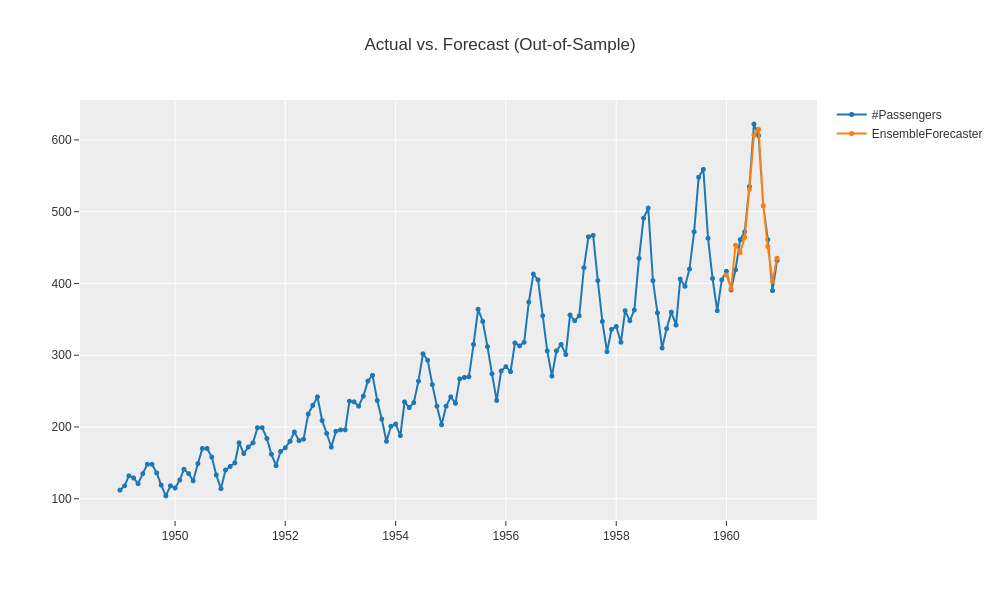

In [ ]:
predictions = exp.predict_model(blender)
exp.plot_model(estimator=blender)

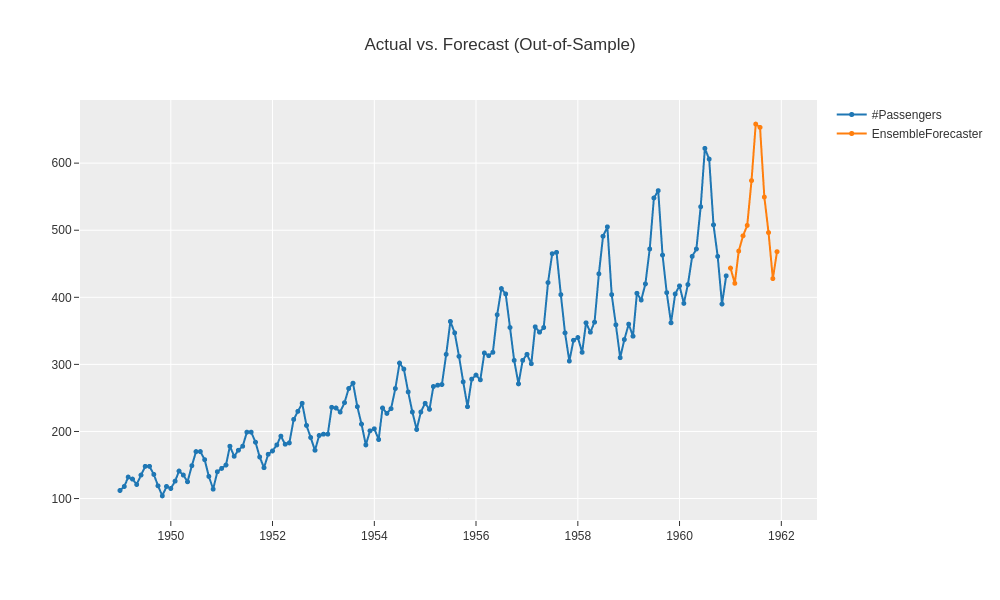

In [ ]:
final_model = exp.finalize_model(blender)
exp.predict_model(final_model)
exp.plot_model(final_model)

In [ ]:
_ = exp.save_model(final_model, "my_blender")

Transformation Pipeline and Model Successfully Saved


In [ ]:
get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [ ]:
loaded_exp = TSForecastingExperiment()
loaded_model = loaded_exp.load_model("my_blender")
loaded_exp.predict_model(loaded_model)

Transformation Pipeline and Model Successfully Loaded


,y_pred
1961-01,443.5568
1961-02,420.8623
1961-03,468.9008
1961-04,491.6614
1961-05,507.2296
1961-06,573.9883
1961-07,658.1668
1961-08,653.2689
1961-09,549.4467
1961-10,496.5341
